In [1]:
import pandas as pd
import numpy as np

In [2]:
df_wine = pd.read_csv('wine.data', header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [4]:
print('Class Labels:', np.unique(df_wine['Class label']))

Class Labels: [1 2 3]


In [5]:
df_wine.head

<bound method NDFrame.head of      Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
5              1    14.20        1.76  2.45               15.2        112   
6              1    14.39        1.87  2.45               14.6         96   
7              1    14.06        2.15  2.61               17.6        121   
8              1    14.83        1.64  2.17               14.0         97   
9              1    13.86        1.35  2.27               16.0         98   
10             1    14.10        2.16  2.30               18.0        105   
11             1    14.12        1.48  2.32   

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()

In [11]:
X_train_norm = mms.fit_transform(X_train)

In [12]:
X_test_norm = mms.transform(X_test)

In [13]:
ex = np.array([0, 1, 2, 3, 4, 5])

In [14]:
print('Standardized:', (ex - ex.mean()) / ex.std())

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [15]:
print('Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
stdsc = StandardScaler()

In [18]:
X_train_std = stdsc.fit_transform(X_train)

In [19]:
X_test_std = stdsc.transform(X_test)

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

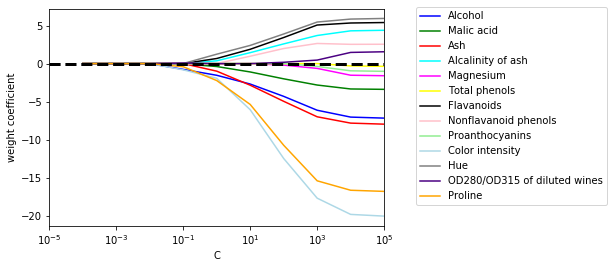

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()